In [10]:
import seaborn as sns
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
torch.backends.cudnn.benchmark = True

from src import query

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
root = ""  # TODO: Change this to the project folder

In [12]:
sim_query = query.BenchmarkQuery(f"{root}/benchmarks/sim_lengths")

In [13]:
speedup_df = sim_query.get_speedup().reset_index()
speedup_df = speedup_df[(speedup_df["batch"] != 1) & (speedup_df["batch"] != 4)]
speedup_df = speedup_df.set_index(["t_len", "units", "batch", "abs_refac"])

In [14]:
layer_query = query.BenchmarkQuery(f"{root}/benchmarks/layers")

In [24]:
def plot_speedup(T, ax):
    sns.lineplot(data=speedup_df.loc[T, 128, :].reset_index(), x="abs_refac", y="total_speedup", hue="batch", linewidth=3, palette=sns.color_palette("Paired"), ax=ax)
    ax.set_ylim([0, 55])
    ax.set_title(f"$T={T}$", fontsize=20, pad=30)
    ax.set_ylabel("Speedup $\\times$", fontsize=20, labelpad=8)
    ax.set_xlabel("ARP (steps)", fontsize=20, labelpad=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=16)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=16)
    
    current_handles, current_labels = ax.get_legend_handles_labels()
    [ha.set_linewidth(4) for ha in current_handles]
    ax.legend(current_handles, current_labels, loc="upper left", title="Batch", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.06))

In [25]:
def plot_layer(ax):
    sns.barplot(layer_query.get_speedup().reset_index(), x="layers", y="total_speedup", hue="units", errorbar=("se"), ax=ax)
    ax.set_title("$T=1024$", fontsize=20, pad=30)
    ax.set_ylim([0, 50])
    ax.set_ylabel("", fontsize=20, labelpad=8)
    ax.set_xlabel("Layer", fontsize=20, labelpad=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2, labelsize=16)
    ax.spines["left"].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, labelsize=16)
    
    current_handles, current_labels = ax.get_legend_handles_labels()
    #[ha.set_linewidth(4) for ha in current_handles]
    ax.legend(current_handles, current_labels, loc="upper left", title="Neurons", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.12))

/tmp/ipykernel_823469/1617452500.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.lineplot(data=speedup_df.loc[T, 128, :].reset_index(), x="abs_refac", y="total_speedup", hue="batch", linewidth=3, palette=sns.color_palette("Paired"), ax=ax)
/tmp/ipykernel_823469/1617452500.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.lineplot(data=speedup_df.loc[T, 128, :].reset_index(), x="abs_refac", y="total_speedup", hue="batch", linewidth=3, palette=sns.color_palette("Paired"), ax=ax)
/tmp/ipykernel_823469/1617452500.py:2: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.lineplot(data=speedup_df.loc[T, 128, :].reset_index(), x="abs_refac", y="total_speedup", hue="batch", linewidth=3, palette=sns.color_palette("Paired"), ax=ax)


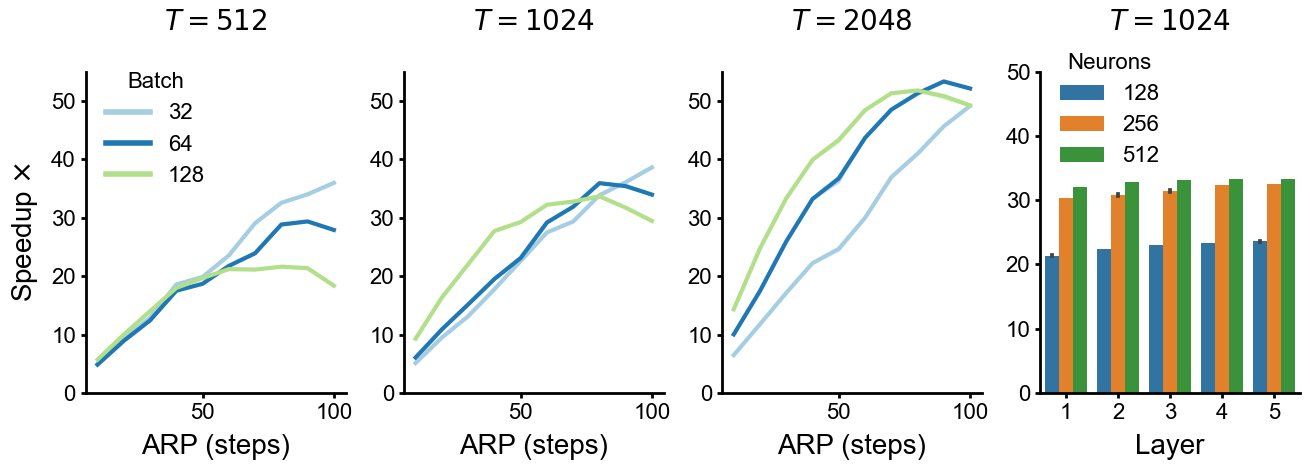

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(6.6*2, 2.4*2))

plot_speedup(512, axs[0])
plot_speedup(1024, axs[1])
plot_speedup(2048, axs[2])
plot_layer(axs[3])

axs[1].legend().set_visible(False)
axs[2].legend().set_visible(False)
axs[1].set_ylabel("")
axs[2].set_ylabel("")

plt.tight_layout()